# Introduction to Linear Regression 



## Learning objectives

1. Analyze a Pandas Dataframe.
2. Create Seaborn plots for Exploratory Data Analysis.
3. Train a Linear Regression Model using Scikit-Learn.




### Import Libraries

In [47]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os 
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
import tensorflow as tf


%matplotlib inline   

###  Load the Dataset

Insurance Sample Data

* 'age': Age of primary beneficiary
* 'sex': Insurance contractor gender, female / male
* 'bmi': Body mass index, providing an understanding of body, objective index of body weight (kg / m ^ 2) using the ratio of height to weight
* 'children': Number of children covered by health insurance / Number of dependents
* 'smoker': Smoker / Non - smoker
* 'region': The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* 'charges': Individual medical costs billed by health insurance.

In [48]:
# Importing the dataset
df = pd.read_csv('../insurance.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())
# Looking for how many unique values there are in the categorical features
print('Different regions - ', df['region'].unique())
print('Different numbers of children - ', df['children'].unique())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


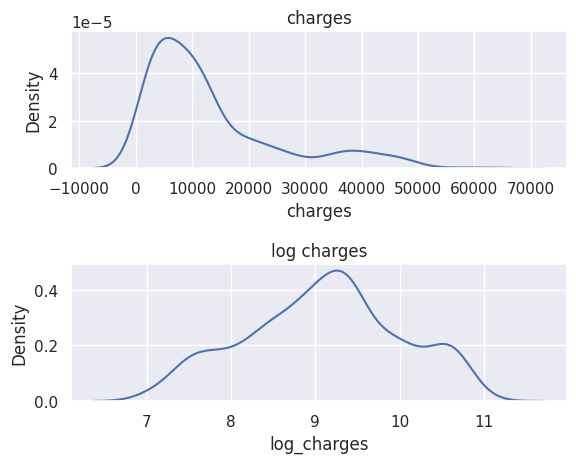

In [49]:
# Adding a log charges as well as charges to train a model to later
df['log_charges'] = np.log(df['charges'])

# PLotting the distribution of charges and log charges to check for normal distribution
fig, ax = plt.subplots(nrows=2)
sns.distplot(df['charges'], ax=ax[0], hist=False).set_title('charges')
sns.distplot(df['log_charges'], ax=ax[1], hist=False).set_title('log charges')
plt.subplots_adjust(hspace=0.7)
plt.show()

Let's check for any null values.

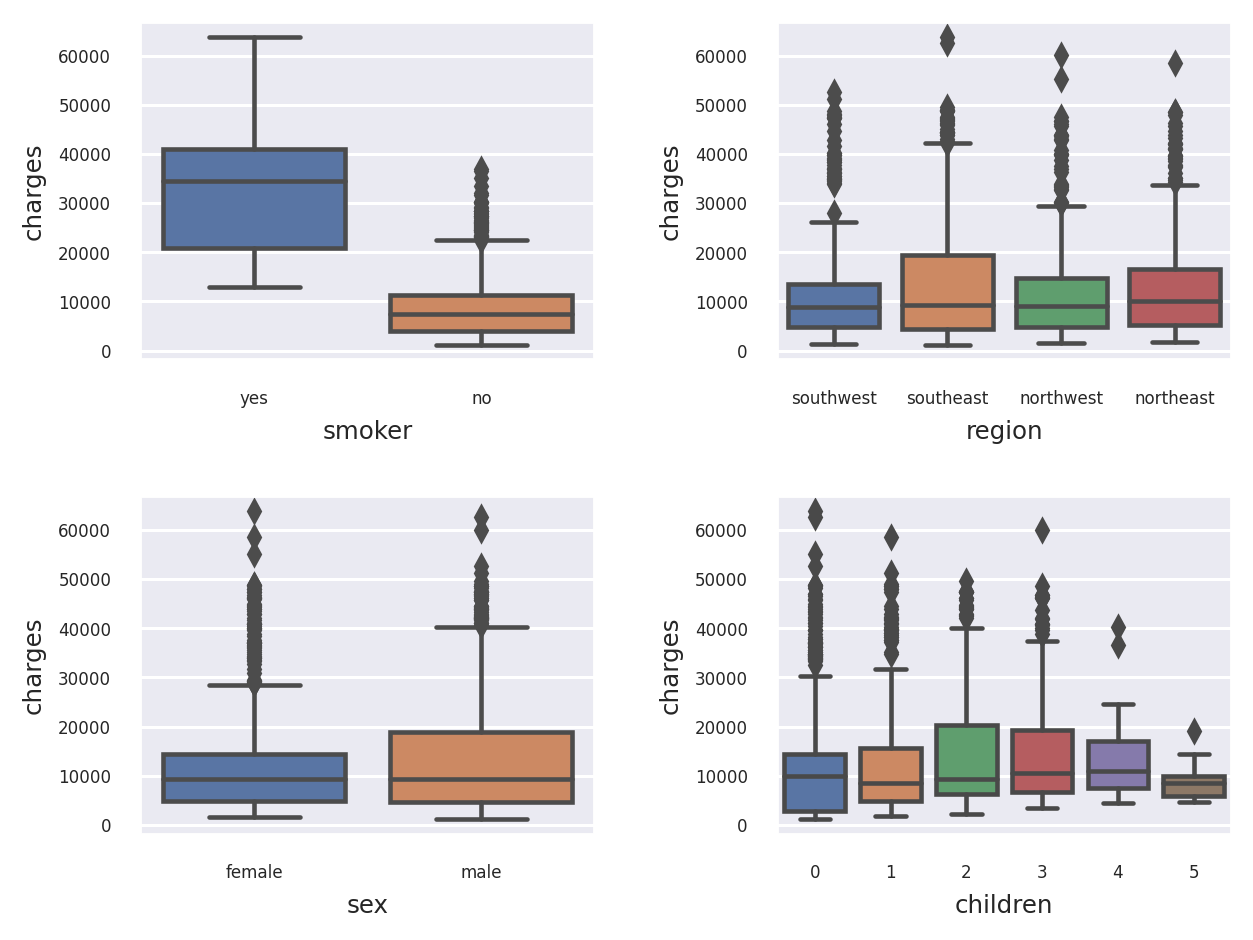

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [50]:
# Adjusting the font size of the figures to match the overall figure size
sns.set(font_scale = 0.5)

# Plotting box and whiskers to show the distribution of charges according to these features
fig = plt.figure(dpi=220)
plt.rcParams["axes.labelsize"] = 8
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data=df, x='children', y='charges', ax=ax)
plt.show()
sns.set(font_scale = 1)

# How many are in each category of children
print(df['children'].value_counts())

In [51]:
X = df[df['smoker'] == 'no']['age'].values
y = df[df['smoker'] == 'no']['charges'].values
print(df.head())
print(X[:5])
print(y[:5])

   age     sex     bmi  children smoker     region      charges  log_charges
0   19  female  27.900         0    yes  southwest  16884.92400     9.734176
1   18    male  33.770         1     no  southeast   1725.55230     7.453302
2   28    male  33.000         3     no  southeast   4449.46200     8.400538
3   33    male  22.705         0     no  northwest  21984.47061     9.998092
4   32    male  28.880         0     no  northwest   3866.85520     8.260197
[18 28 33 32 31]
[ 1725.5523   4449.462   21984.47061  3866.8552   3756.6216 ]


## 2. 통계적 방법(정규 방정식) 

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [52]:
X_b = np.c_[np.ones((len(X), 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [53]:
theta_best

array([-2091.42055657,   267.24891283])

Let's take a peek at the first and last five rows of the data for all columns.

In [54]:
X_new = np.array([[18],[64]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([ 2719.0598744 , 15012.50986463])

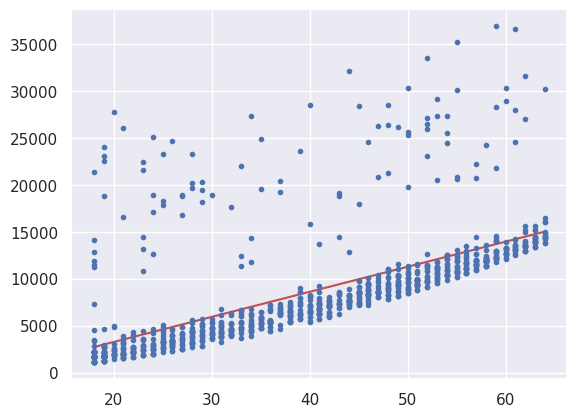

In [55]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

## 선형대수(행렬)을 이용하여 풀기

유사역행렬은 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용하여 계산.

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_b, y)

LinearRegression()

In [57]:
lm.intercept_, lm.coef_

(-2091.4205565650827, array([  0.        , 267.24891283]))

In [58]:
np.linalg.pinv(X_b).dot(y)

array([-2091.42055657,   267.24891283])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

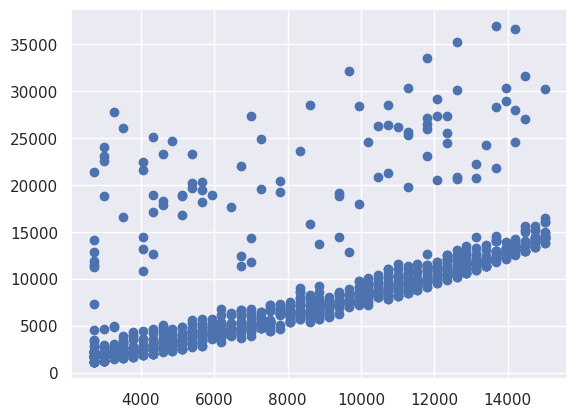

In [59]:
# Predict values based on linear model object.
predictions = lm.predict(X_b)
# Scatter plots are widely used to represent relation among variables and how change in one affects the other.
plt.scatter(predictions, y)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

In [60]:
# Importing metrics from sklearn
from sklearn import metrics

In [61]:
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 2580.523228211604
MSE: 21738960.02391763
RMSE: 4662.505766636395


In [62]:
X_c = np.c_[X_b, np.power(X, 2)]
print(X_c)

[[1.000e+00 1.800e+01 3.240e+02]
 [1.000e+00 2.800e+01 7.840e+02]
 [1.000e+00 3.300e+01 1.089e+03]
 ...
 [1.000e+00 1.800e+01 3.240e+02]
 [1.000e+00 1.800e+01 3.240e+02]
 [1.000e+00 2.100e+01 4.410e+02]]


In [63]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_c, y)

LinearRegression()

In [64]:
lm2.intercept_, lm2.coef_

(1660.935232524247, array([ 0.        , 50.27919633,  2.7398977 ]))

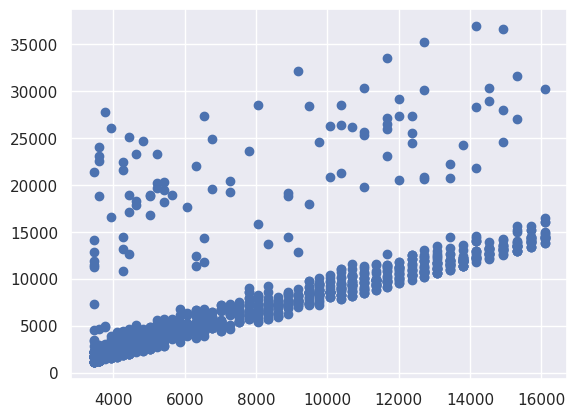

In [65]:
# Predict values based on linear model object.
predictions2 = lm2.predict(X_c)
# Scatter plots are widely used to represent relation among variables and how change in one affects the other.
plt.scatter(predictions2, y)

In [66]:
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y, predictions2))
print('MSE:', metrics.mean_squared_error(y, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions2)))

MAE: 2564.8562269574045
MSE: 21524113.672409553
RMSE: 4639.408763238001
